In [1]:
import numpy as np
import pandas as pd
from itertools import *
import matplotlib.pyplot as plt

In [2]:
def read_data(url, header):
    df = pd.read_csv(url, header=header, index_col=0)
    return df

In [3]:
np.abs(np.random.normal(0, 1, 5)) * 100

array([42.73676999, 28.62519283, 35.39058905, 36.79842023, 47.71033549])

In [4]:
def add_noise(df,scorer,bodypart,coord, m, noise):
    
    df.loc[filenames[:m],(scorer, bodypart, coord)] = df.loc[filenames[:m],(scorer, bodypart, coord)] + np.abs(np.random.normal(0, 1, m)) * noise
    return df

In [5]:
def swap_2bodyparts(df,df_fake,scorer,bodypart1, bodypart2, n):
    df_fake.loc[filenames[:n],(scorer, bodypart1, 'x')] = df.loc[filenames[:n],(scorer, bodypart2, 'x')]
    df_fake.loc[filenames[:n],(scorer, bodypart1, 'y')] = df.loc[filenames[:n],(scorer, bodypart2, 'y')]
    
    df_fake.loc[filenames[:n],(scorer, bodypart2, 'x')] = df.loc[filenames[:n],(scorer, bodypart1, 'x')]
    df_fake.loc[filenames[:n],(scorer, bodypart2, 'y')] = df.loc[filenames[:n],(scorer, bodypart1, 'y')]
    return df_fake

In [6]:
def comp_dist(features,df, scorer, bodypart1, bodypart2):
    name = bodypart1 + '_' + bodypart2
    features[name] = np.sqrt(np.square(df[scorer,bodypart1, 'x'] - df[scorer,bodypart2, 'x'])+np.square(df[scorer,bodypart1, 'y'] - df[scorer, bodypart2, 'y']))
    
    
    return features

In [7]:
# calculate the angle sign between 3 keypoints (if negative, swapping might have occured)
def get_angle(name,features,df, scorer, bodypart3, bodypart2, bodypart1):
    features[name] = np.degrees(np.arctan2(df[scorer, bodypart3, 'y']-df[scorer,bodypart2, 'y'],df[scorer, bodypart3, 'x']-df[scorer,bodypart2, 'x']) - np.arctan2(df[scorer, bodypart1, 'y']-df[scorer,bodypart2, 'y'],df[scorer, bodypart1, 'x']-df[scorer,bodypart2, 'x']))
    return features

In [8]:
# calculate the angle sign between 3 keypoints (if negative, swapping might have occured)
def get_anglesign(name,features,df, scorer, bodypart3, bodypart2, bodypart1):
    features[name] = np.sign(np.degrees(np.arctan2(df[scorer, bodypart3, 'y']-df[scorer,bodypart2, 'y'],df[scorer, bodypart3, 'x']-df[scorer,bodypart2, 'x']) - np.arctan2(df[scorer, bodypart1, 'y']-df[scorer,bodypart2, 'y'],df[scorer, bodypart1, 'x']-df[scorer,bodypart2, 'x'])))
    return features

In [9]:
# plot indices
def plot_ind(x_data,y_data,labels,cluster_n):
    pic_num = np.array(np.where(labels==cluster_n))
    for i in pic_num[0,:]:
        plt.text(x_data[i]+0.1,y_data[i],i)
    return 

In [10]:
def find_y_size(df, num, scorer, bodyparts):
    #x_min = min(df.loc[filenames[num], (scorer,bodyparts,'x' )])
    y_min = min(df.loc[filenames[num], (scorer,bodyparts,'y' )])
    
    #x_max = max(df.loc[filenames[num], (scorer,bodyparts,'x' )])
    y_max = max(df.loc[filenames[num], (scorer,bodyparts,'y' )])
    
    return (y_max - y_min)

In [11]:
filename = 'C:/Users/User/Anna/Clustering/hourse-10/data/CollectedData_Byron.csv'
header = [0, 1, 2] ### if multi-animal project, header = [0, 1, 2, 3]

df = read_data(filename, header)
df

scorer                             Byron                              \
bodyparts                           Nose        Eye     Nearknee       
coords                                 x      y   x   y        x   y   
BrownHorseinShadow/0050.png         17.0  302.0 NaN NaN      NaN NaN   
BrownHorseinShadow/0051.png         21.0  304.0 NaN NaN      NaN NaN   
BrownHorseinShadow/0052.png         24.0  301.0 NaN NaN      NaN NaN   
BrownHorseinShadow/0053.png         30.0  302.0 NaN NaN      NaN NaN   
BrownHorseinShadow/0054.png         32.0  299.0 NaN NaN      NaN NaN   
...                                  ...    ...  ..  ..      ...  ..   
Twohorsesinvideoonemoving/0248.png   NaN    NaN NaN NaN      NaN NaN   
Twohorsesinvideoonemoving/0249.png   NaN    NaN NaN NaN      NaN NaN   
Twohorsesinvideoonemoving/0250.png   NaN    NaN NaN NaN      NaN NaN   
Twohorsesinvideoonemoving/0251.png   NaN    NaN NaN NaN      NaN NaN   
Twohorsesinvideoonemoving/0252.png   NaN    NaN NaN NaN      NaN NaN   

scorer                                                                     \
bodyparts                          Nearfrontfetlock     Nearfrontfoot       
coords                                            x   y             x   y   
BrownHorseinShadow/0050.png                     NaN NaN           NaN NaN   
BrownHorseinShadow/0051.png                     NaN NaN           NaN NaN   
BrownHorseinShadow/0052.png                     NaN NaN           NaN NaN   
BrownHorseinShadow/0053.png                     NaN NaN           NaN NaN   
BrownHorseinShadow/0054.png                     NaN NaN           NaN NaN   
...                                             ...  ..           ...  ..   
Twohorsesinvideoonemoving/0248.png              NaN NaN           NaN NaN   
Twohorsesinvideoonemoving/0249.png              NaN NaN           NaN NaN   
Twohorsesinvideoonemoving/0250.png              NaN NaN           NaN NaN   
Twohorsesinvideoonemoving/0251.png              NaN NaN           NaN NaN   
Twohorsesinvideoonemoving/0252.png              NaN NaN           NaN NaN   

scorer                              ...                             \
bodyparts                           ... Stifle     Offhindhock       
coords                              ...      x   y           x   y   
BrownHorseinShadow/0050.png         ...    NaN NaN         NaN NaN   
BrownHorseinShadow/0051.png         ...    NaN NaN         NaN NaN   
BrownHorseinShadow/0052.png         ...    NaN NaN         NaN NaN   
BrownHorseinShadow/0053.png         ...    NaN NaN         NaN NaN   
BrownHorseinShadow/0054.png         ...    NaN NaN         NaN NaN   
...                                 ...    ...  ..         ...  ..   
Twohorsesinvideoonemoving/0248.png  ...    NaN NaN         NaN NaN   
Twohorsesinvideoonemoving/0249.png  ...    NaN NaN         NaN NaN   
Twohorsesinvideoonemoving/0250.png  ...    NaN NaN         NaN NaN   
Twohorsesinvideoonemoving/0251.png  ...    NaN NaN         NaN NaN   
Twohorsesinvideoonemoving/0252.png  ...    NaN NaN         NaN NaN   

scorer                                                                       \
bodyparts                          Offhindfetlock        Offhindfoot          
coords                                          x      y           x      y   
BrownHorseinShadow/0050.png                   NaN    NaN         NaN    NaN   
BrownHorseinShadow/0051.png                   NaN    NaN         NaN    NaN   
BrownHorseinShadow/0052.png                   NaN    NaN         NaN    NaN   
BrownHorseinShadow/0053.png                   NaN    NaN         NaN    NaN   
BrownHorseinShadow/0054.png                   NaN    NaN         NaN    NaN   
...                                           ...    ...         ...    ...   
Twohorsesinvideoonemoving/0248.png          934.0  390.0       947.0  416.0   
Twohorsesinvideoonemoving/0249.png          934.0  390.0       947.0  416.0   
Twohorsesinvideoonemoving/0250.png          936.0  390.0      

In [12]:
df = df.dropna()
df

scorer                              Byron                                \
bodyparts                            Nose           Eye        Nearknee   
coords                                  x      y      x      y        x   
BrownHorseinShadow/0131.png         304.0  287.0  270.0  216.0    220.0   
BrownHorseinShadow/0132.png         309.0  288.0  279.0  222.0    222.0   
BrownHorseinShadow/0133.png         313.0  293.0  282.0  223.0    223.0   
BrownHorseinShadow/0134.png         319.0  293.0  286.0  226.0    225.0   
BrownHorseinShadow/0135.png         322.0  297.0  292.0  229.0    228.0   
...                                   ...    ...    ...    ...      ...   
Twohorsesinvideoonemoving/0162.png  934.0  271.0  912.0  221.0    722.0   
Twohorsesinvideoonemoving/0163.png  938.0  270.0  917.0  221.0    722.0   
Twohorsesinvideoonemoving/0164.png  946.0  265.0  925.0  219.0    722.0   
Twohorsesinvideoonemoving/0165.png  950.0  264.0  931.0  216.0    722.0   
Twohorsesinvideoonemoving/0166.png  954.0  262.0  936.0  216.0    722.0   

scorer                                                             \
bodyparts                                 Nearfrontfetlock          
coords                                  y                x      y   
BrownHorseinShadow/0131.png         337.0            222.0  384.0   
BrownHorseinShadow/0132.png         338.0            222.0  384.0   
BrownHorseinShadow/0133.png         338.0            222.0  383.0   
BrownHorseinShadow/0134.png         338.0            224.0  379.0   
BrownHorseinShadow/0135.png         337.0            226.0  380.0   
...                                   ...              ...    ...   
Twohorsesinvideoonemoving/0162.png  346.0            708.0  394.0   
Twohorsesinvideoonemoving/0163.png  352.0            707.0  392.0   
Twohorsesinvideoonemoving/0164.png  352.0            708.0  394.0   
Twohorsesinvideoonemoving/0165.png  352.0            708.0  395.0   
Twohorsesinvideoonemoving/0166.png  352.0            710.0  392.0   

scorer                                                   ...                \
bodyparts                          Nearfrontfoot         ... Stifle          
coords                                         x      y  ...      x      y   
BrownHorseinShadow/0131.png                240.0  403.0  ...   73.0  272.0   
BrownHorseinShadow/0132.png                240.0  403.0  ...   76.0  272.0   
BrownHorseinShadow/0133.png                240.0  403.0  ...   76.0  271.0   
BrownHorseinShadow/0134.png                240.0  403.0  ...   84.0  269.0   
BrownHorseinShadow/0135.png                240.0  403.0  ...   84.0  269.0   
...                                          ...    ...  ...    ...    ...   
Twohorsesinvideoonemoving/0162.png         720.0  418.0  ...  611.0  281.0   
Twohorsesinvideoonemoving/0163.png         720.0  418.0  ...  625.0  280.0   
Twohorsesinvideoonemoving/0164.png         720.0  418.0  ...  629.0  278.0   
Twohorsesinvideoonemoving/0165.png         720.0  418.0  ...  630.0  278.0   
Twohorsesinvideoonemoving/0166.png         720.0  418.0  ...  636.0  278.0   

scorer                                                                       \
bodyparts                          Offhindhock        Offhindfetlock          
coords                                       x      y              x      y   
BrownHorseinShadow/0131.png               69.0  323.0          100.0  380.0   
BrownHorseinShadow/0132.png               79.0  323.0          108.0  383.0   
BrownHorseinShadow/0133.png               84.0  326.0          117.0  384.0   
BrownHorseinShadow/0134.png               87.0  326.0          122.0  385.0   
BrownHorseinShadow/0135.png               97.0  329.0          127.0  384.0   
...                                        ...    ...            ...    ...   
Twohorsesinvideoonemoving/0162.png       593.0  352.0          612.0  410.0   
Twohorsesinvideoonemoving/0163.png       599.0  348.0          612.0  410.0   
Twohorsesinvideoonem

In [13]:
filenames = df.index
scorer = 'Byron'

In [17]:
a = df.columns
bodyparts = np.zeros(len(df.columns)).astype(str)
coord = np.zeros(len(df.columns)).astype(str)

In [18]:
#bodyparts = np.zeros(len(df.columns)).astype(str)
for i in range(len(df.columns)):
    bodyparts[i] = a[i][1]
    coord[i] = a[i][2]

In [19]:
bodyparts = np.unique(bodyparts)
bodyparts

array(['Elbow', 'Eye', 'Girth', 'Hip', 'Ischium', 'Midshoulder',
       'Nearfrontfetlock', 'Nearfrontfoot', 'Nearhindfetlock',
       'Nearhindfoot', 'Nearhindhock', 'Nearknee', 'Nose',
       'Offfrontfetlock', 'Offfrontfoot', 'Offhindfetlock', 'Offhindfoot',
       'Offhindhock', 'Offknee', 'Shoulder', 'Stifle', 'Wither'],
      dtype='<U32')

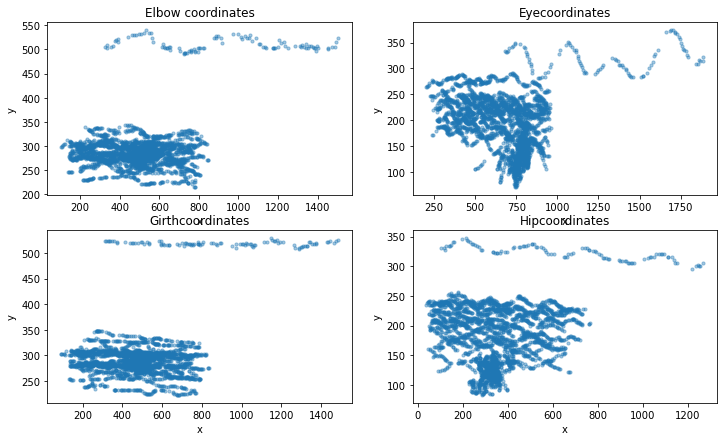

In [20]:
# data visualization

fig, axs = plt.subplots(2, 2, figsize=(12, 7))
axs[0, 0].scatter(df.loc[filenames[:],(scorer, bodyparts[0], 'x')], df.loc[filenames[:],(scorer, bodyparts[0], 'y')], s = 10, alpha=0.4)
axs[0, 0].set_title (bodyparts[0] +" coordinates")

axs[0, 1].scatter(df.loc[filenames[:],(scorer, bodyparts[1], 'x')], df.loc[filenames[:],(scorer, bodyparts[1], 'y')], s = 10, alpha=0.4)
axs[0, 1].set_title (bodyparts[1] +"coordinates")

axs[1, 0].scatter(df.loc[filenames[:],(scorer, bodyparts[2], 'x')], df.loc[filenames[:],(scorer, bodyparts[2], 'y')], s = 10, alpha=0.4)
axs[1, 0].set_title (bodyparts[2] +"coordinates")

axs[1, 1].scatter(df.loc[filenames[:],(scorer, bodyparts[3], 'x')], df.loc[filenames[:],(scorer, bodyparts[3], 'y')], s = 10, alpha=0.4)
axs[1, 1].set_title (bodyparts[3] +"coordinates")

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

# for ax in axs.flat:
#     ax.label_outer()


In [21]:
df_features = pd.DataFrame()

for bodypart_list in combinations(bodyparts, 2):
    df_features = comp_dist(df_features,df, scorer,bodypart_list[0], bodypart_list[1])
    
df_features.head()

,Elbow_Eye,Elbow_Girth,Elbow_Hip,Elbow_Ischium,Elbow_Midshoulder,Elbow_Nearfrontfetlock,Elbow_Nearfrontfoot,Elbow_Nearhindfetlock,Elbow_Nearhindfoot,Elbow_Nearhindhock,...,Offhindhock_Offknee,Offhindhock_Shoulder,Offhindhock_Stifle,Offhindhock_Wither,Offknee_Shoulder,Offknee_Stifle,Offknee_Wither,Shoulder_Stifle,Shoulder_Wither,Stifle_Wither
BrownHorseinShadow/0131.png,132.003788,8.062258,132.548104,144.996552,73.498299,125.095963,150.903943,148.922799,150.711645,106.230881,...,106.480045,139.588681,51.156622,180.800996,95.126232,126.035709,172.072659,119.941652,80.411442,140.185591
BrownHorseinShadow/0132.png,134.617978,9.219544,136.883162,148.932871,75.802375,121.264174,146.996599,150.711645,151.743204,108.268186,...,116.709040,131.726990,51.088159,175.573346,91.000000,139.517024,170.660482,117.957620,80.411442,138.708327
BrownHorseinShadow/0133.png,135.959553,10.000000,137.440896,150.296374,79.881162,115.433964,142.003521,150.602125,150.748134,109.416635,...,118.532696,135.484316,55.578773,178.339564,89.005618,145.261833,169.070991,124.903963,81.024688,141.675686
BrownHorseinShadow/0134.png,133.270402,10.630146,140.356688,154.738489,81.987804,109.077954,137.905765,154.841855,154.155765,113.885908,...,121.926207,137.200583,57.078893,179.446371,85.052925,143.387587,165.339046,121.696343,81.024688,138.105032
BrownHorseinShadow/0135.png,130.613935,12.727922,141.354165,154.304893,77.820306,108.300508,135.203550,161.152102,159.831161,118.680243,...,121.696343,138.437712,61.392182,176.646540,87.091905,152.594233,167.886867,130.751673,82.540899,138.105032


In [22]:
df_features.shape

(3069, 231)

In [23]:
distances = df_features.columns
distances[0]

'Elbow_Eye'

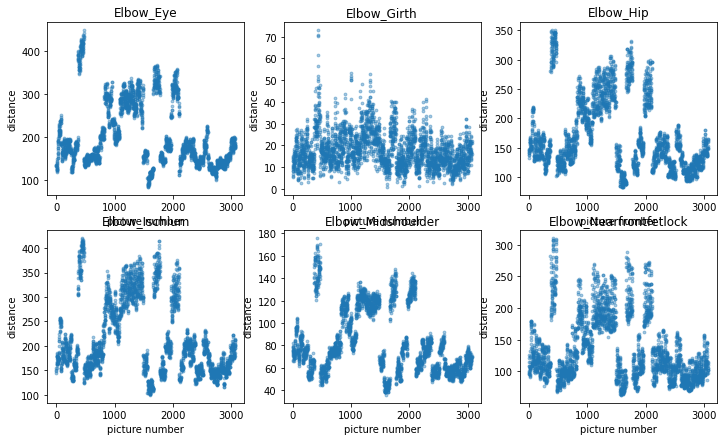

In [24]:
# visualization of distances

fig, axs = plt.subplots(2, 3, figsize=(12, 7))
ind = range(df.shape[0])
axs[0, 0].scatter(ind, df_features[distances[0]], s = 8, alpha=0.4)
axs[0, 0].set_title (distances[0])

axs[0, 1].scatter(ind, df_features[distances[1]], s = 8, alpha=0.4)
axs[0, 1].set_title (distances[1])

axs[0, 2].scatter(ind, df_features[distances[2]], s = 8, alpha=0.4)
axs[0, 2].set_title (distances[2])

axs[1, 0].scatter(ind, df_features[distances[3]], s = 8, alpha=0.4)
axs[1, 0].set_title (distances[3])

axs[1, 1].scatter(ind, df_features[distances[4]], s = 8, alpha=0.4)
axs[1, 1].set_title (distances[4])

axs[1, 2].scatter(ind, df_features[distances[5]], s = 8, alpha=0.4)
axs[1, 2].set_title (distances[5])

for ax in axs.flat:
    ax.set(xlabel='picture number', ylabel='distance')


# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [25]:
inx = np.where(filenames == 'Sample20/0020.png')
sample =df.loc['Sample20/0020.png', (scorer, bodyparts, 'y')]
samp_size = max(sample) - min(sample)
samp_size

404.0

In [26]:
# normalization

# Sample20/0020.png -->
y_size = []
coef = []
for i in range(df_features.shape[0]):
    y_size.append(find_y_size(df, i, scorer, bodyparts))
    coef.append(y_size[i]/samp_size)


In [27]:
df_norm = df_features.copy()
for i in range(df_features.shape[1]):
    df_norm.loc[filenames,distances[i]] = [a/b for a,b in zip(df_features.loc[filenames,distances[i]], coef)]
df_norm.head()

,Elbow_Eye,Elbow_Girth,Elbow_Hip,Elbow_Ischium,Elbow_Midshoulder,Elbow_Nearfrontfetlock,Elbow_Nearfrontfoot,Elbow_Nearhindfetlock,Elbow_Nearhindfoot,Elbow_Nearhindhock,...,Offhindhock_Offknee,Offhindhock_Shoulder,Offhindhock_Stifle,Offhindhock_Wither,Offknee_Shoulder,Offknee_Stifle,Offknee_Wither,Shoulder_Stifle,Shoulder_Wither,Stifle_Wither
BrownHorseinShadow/0131.png,237.020135,14.476232,237.997485,260.349364,131.970280,224.616752,270.956413,267.399159,270.611132,190.743448,...,191.190836,250.639233,91.854557,324.638232,170.804434,226.304118,308.966019,215.361900,144.383211,251.711017
BrownHorseinShadow/0132.png,240.644527,16.480956,244.693794,266.233981,135.505130,216.773126,262.772681,269.413737,271.257763,193.541358,...,208.630319,235.476567,91.325736,313.856779,162.672566,249.402114,305.074489,210.862293,143.744348,247.956478
BrownHorseinShadow/0133.png,241.972068,17.797357,244.608468,267.487820,142.167354,205.441944,252.728734,268.031975,268.291834,194.732689,...,210.956868,241.126272,98.915525,317.397285,158.406474,258.527667,300.901676,222.296040,144.202528,252.145274
BrownHorseinShadow/0134.png,237.186090,18.918850,249.797807,275.393611,145.916620,194.129927,245.435811,275.577574,274.356516,202.686814,...,216.996422,244.180773,101.585342,319.367109,151.371725,255.192004,294.259799,216.587325,144.202528,245.790454
BrownHorseinShadow/0135.png,232.458281,22.652337,251.573052,274.621924,138.499575,192.746278,240.626583,286.808146,284.457220,211.219463,...,216.587325,246.382535,109.261857,314.384150,155.000572,271.577402,298.794247,232.703418,146.900983,245.790454


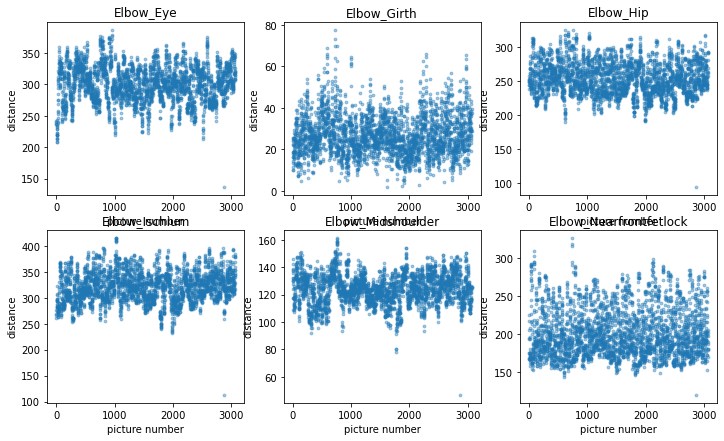

In [28]:
# visualization of distances

fig, axs = plt.subplots(2, 3, figsize=(12, 7))
ind = range(df.shape[0])
axs[0, 0].scatter(ind, df_norm[distances[0]], s = 8, alpha=0.4)
axs[0, 0].set_title (distances[0])

axs[0, 1].scatter(ind, df_norm[distances[1]], s = 8, alpha=0.4)
axs[0, 1].set_title (distances[1])

axs[0, 2].scatter(ind, df_norm[distances[2]], s = 8, alpha=0.4)
axs[0, 2].set_title (distances[2])

axs[1, 0].scatter(ind, df_norm[distances[3]], s = 8, alpha=0.4)
axs[1, 0].set_title (distances[3])

axs[1, 1].scatter(ind, df_norm[distances[4]], s = 8, alpha=0.4)
axs[1, 1].set_title (distances[4])

axs[1, 2].scatter(ind, df_norm[distances[5]], s = 8, alpha=0.4)
axs[1, 2].set_title (distances[5])

for ax in axs.flat:
    ax.set(xlabel='picture number', ylabel='distance')


# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

In [41]:
bodypart = 'Nose'
m = 500 #len(filenames) // 5 # 1/5 pictures with fake noise
print("pictures with fake noise", m)

pictures with fake noise 500


In [42]:
# add random noise
fake_data = df.copy(deep=True)

noise = 100
fake_data = add_noise(fake_data,scorer,bodypart,'x',m,noise)
fake_data = add_noise(fake_data,scorer,bodypart,'y',m,noise)
fake_data.head(25)

scorer                            Byron                                     \
bodyparts                          Nose                Eye        Nearknee   
coords                                x           y      x      y        x   
BrownHorseinShadow/0131.png  369.904643  309.283352  270.0  216.0    220.0   
BrownHorseinShadow/0132.png  317.489384  384.646532  279.0  222.0    222.0   
BrownHorseinShadow/0133.png  443.395851  327.475958  282.0  223.0    223.0   
BrownHorseinShadow/0134.png  558.938225  401.554711  286.0  226.0    225.0   
BrownHorseinShadow/0135.png  470.404598  412.232245  292.0  229.0    228.0   
BrownHorseinShadow/0139.png  556.656939  481.786929  315.0  239.0    229.0   
BrownHorseinShadow/0140.png  441.738016  346.650543  319.0  242.0    232.0   
BrownHorseinShadow/0141.png  428.694094  330.854271  322.0  241.0    232.0   
BrownHorseinShadow/0142.png  445.530884  450.891752  320.0  241.0    232.0   
BrownHorseinShadow/0143.png  442.400674  324.227584  324.0  240.0    234.0   
BrownHorseinShadow/0144.png  368.208208  314.885779  329.0  238.0    237.0   
BrownHorseinShadow/0145.png  414.029388  458.757371  335.0  238.0    238.0   
BrownHorseinShadow/0146.png  372.609148  313.964014  341.0  235.0    240.0   
BrownHorseinShadow/0147.png  390.587466  304.029575  346.0  232.0    240.0   
BrownHorseinShadow/0158.png  443.537357  348.521748  398.0  227.0    261.0   
BrownHorseinShadow/0159.png  472.854940  327.283616  404.0  226.0    263.0   
BrownHorseinShadow/0160.png  481.493318  306.891885  405.0  222.0    270.0   
BrownHorseinShadow/0161.png  488.336398  367.629904  411.0  224.0    275.0   
BrownHorseinShadow/0162.png  633.686933  445.839864  417.0  223.0    285.0   
BrownHorseinShadow/0163.png  483.361972  396.636430  421.0  221.0    294.0   
BrownHorseinShadow/0164.png  597.475743  361.132735  426.0  222.0    303.0   
BrownHorseinShadow/0168.png  617.608643  350.742476  454.0  238.0    348.0   
BrownHorseinShadow/0169.png  509.726852  317.606577  460.0  237.0    354.0   
BrownHorseinShadow/0171.png  500.308197  314.155401  471.0  240.0    374.0   
BrownHorseinShadow/0173.png  519.401184  402.772022  482.0  243.0    390.0   

scorer                                                                    \
bodyparts                          Nearfrontfetlock        Nearfrontfoot   
coords                           y                x      y             x   
BrownHorseinShadow/0131.png  337.0            222.0  384.0         240.0   
BrownHorseinShadow/0132.png  338.0            222.0  384.0         240.0   
BrownHorseinShadow/0133.png  338.0            222.0  383.0         240.0   
BrownHorseinShadow/0134.png  338.0            224.0  379.0         240.0   
BrownHorseinShadow/0135.png  337.0            226.0  380.0         240.0   
BrownHorseinShadow/0139.png  335.0            223.0  379.0         236.0   
BrownHorseinShadow/0140.png  333.0            223.0  379.0         236.0   
BrownHorseinShadow/0141.png  333.0            223.0  379.0         236.0   
BrownHorseinShadow/0142.png  333.0            223.0  379.0         236.0   
BrownHorseinShadow/0143.png  335.0            223.0  379.0         236.0   
BrownHorseinShadow/0144.png  334.0            223.0  379.0         236.0   
BrownHorseinShadow/0145.png  335.0            223.0  379.0         236.0   
BrownHorseinShadow/0146.png  335.0            223.0  379.0         236.0   
BrownHorseinShadow/0147.png  334.0            223.0  379.0         236.0   
BrownHorseinShadow/0158.png  336.0            238.0  374.0         238.0   
BrownHorseinShadow/0159.png  336.0            240.0  374.0         241.0   
BrownHorseinShadow/0160.png  334.0            243.0  373.0         242.0   
BrownHorseinShadow/0161.png  332.0            248.0  373.0         242.0   
BrownHorseinShadow/0162.png  336.0            255.0  374.0         245.0   
BrownHorseinShadow/0163.png  338.0            265.0  376.0         249.0   
BrownHorseinShadow/0164.png  339.0            277.0  378.0         

In [43]:
features_fakedf = pd.DataFrame()

for bodypart_list in combinations(bodyparts, 2):
    features_fakedf = comp_dist(features_fakedf,df, scorer,bodypart_list[0], bodypart_list[1])

features_fakedf.head(10)

,Elbow_Eye,Elbow_Girth,Elbow_Hip,Elbow_Ischium,Elbow_Midshoulder,Elbow_Nearfrontfetlock,Elbow_Nearfrontfoot,Elbow_Nearhindfetlock,Elbow_Nearhindfoot,Elbow_Nearhindhock,...,Offhindhock_Offknee,Offhindhock_Shoulder,Offhindhock_Stifle,Offhindhock_Wither,Offknee_Shoulder,Offknee_Stifle,Offknee_Wither,Shoulder_Stifle,Shoulder_Wither,Stifle_Wither
BrownHorseinShadow/0131.png,132.003788,8.062258,132.548104,144.996552,73.498299,125.095963,150.903943,148.922799,150.711645,106.230881,...,106.480045,139.588681,51.156622,180.800996,95.126232,126.035709,172.072659,119.941652,80.411442,140.185591
BrownHorseinShadow/0132.png,134.617978,9.219544,136.883162,148.932871,75.802375,121.264174,146.996599,150.711645,151.743204,108.268186,...,116.709040,131.726990,51.088159,175.573346,91.000000,139.517024,170.660482,117.957620,80.411442,138.708327
BrownHorseinShadow/0133.png,135.959553,10.000000,137.440896,150.296374,79.881162,115.433964,142.003521,150.602125,150.748134,109.416635,...,118.532696,135.484316,55.578773,178.339564,89.005618,145.261833,169.070991,124.903963,81.024688,141.675686
BrownHorseinShadow/0134.png,133.270402,10.630146,140.356688,154.738489,81.987804,109.077954,137.905765,154.841855,154.155765,113.885908,...,121.926207,137.200583,57.078893,179.446371,85.052925,143.387587,165.339046,121.696343,81.024688,138.105032
BrownHorseinShadow/0135.png,130.613935,12.727922,141.354165,154.304893,77.820306,108.300508,135.203550,161.152102,159.831161,118.680243,...,121.696343,138.437712,61.392182,176.646540,87.091905,152.594233,167.886867,130.751673,82.540899,138.105032
BrownHorseinShadow/0139.png,126.873953,10.770330,147.200543,161.136588,78.549348,99.724621,125.542821,176.300879,177.589414,135.440024,...,144.055545,150.632002,62.169124,181.969778,86.683332,169.000000,169.189243,140.431478,83.671979,141.534448
BrownHorseinShadow/0140.png,125.542821,5.830952,142.200563,164.395864,78.790862,99.689518,125.283678,177.507746,181.320159,137.640837,...,149.000000,155.618122,65.924199,185.569394,85.906926,172.699160,169.189243,143.265488,84.528102,141.598023
BrownHorseinShadow/0141.png,126.530629,9.433981,145.801235,162.163498,76.059187,97.082439,122.527548,177.002825,182.428068,137.087563,...,157.012738,158.808060,65.620119,186.590461,82.710338,177.552809,169.366467,145.993151,87.658428,141.598023
BrownHorseinShadow/0142.png,119.970830,13.928388,145.602198,163.082801,75.133215,96.176920,121.276543,181.342218,186.400107,138.495487,...,162.049375,163.975608,64.381674,190.286626,80.523289,179.334882,166.784292,150.083310,87.206651,146.000000
BrownHorseinShadow/0143.png,123.130013,12.649111,143.840189,162.963186,74.686009,96.026038,121.049577,180.471604,187.200427,140.246212,...,170.002941,166.481230,64.031242,192.481168,82.565126,183.174780,171.026314,148.862353,89.000000,145.248064


In [44]:
# normalization

# Sample20/0020.png -->
y_size = []
coef = []
for i in range(df_features.shape[0]):
    y_size.append(find_y_size(fake_data, i, scorer, bodyparts))
    coef.append(y_size[i]/samp_size)

In [45]:
fakedf_norm = features_fakedf.copy()
for i in range(features_fakedf.shape[1]):
    fakedf_norm.loc[filenames,distances[i]] = [a/b for a,b in zip(features_fakedf.loc[filenames,distances[i]], coef)]
fakedf_norm.head(10)

,Elbow_Eye,Elbow_Girth,Elbow_Hip,Elbow_Ischium,Elbow_Midshoulder,Elbow_Nearfrontfetlock,Elbow_Nearfrontfoot,Elbow_Nearhindfetlock,Elbow_Nearhindfoot,Elbow_Nearhindhock,...,Offhindhock_Offknee,Offhindhock_Shoulder,Offhindhock_Stifle,Offhindhock_Wither,Offknee_Shoulder,Offknee_Stifle,Offknee_Wither,Shoulder_Stifle,Shoulder_Wither,Stifle_Wither
BrownHorseinShadow/0131.png,237.020135,14.476232,237.997485,260.349364,131.970280,224.616752,270.956413,267.399159,270.611132,190.743448,...,191.190836,250.639233,91.854557,324.638232,170.804434,226.304118,308.966019,215.361900,144.383211,251.711017
BrownHorseinShadow/0132.png,240.644527,16.480956,244.693794,266.233981,135.505130,216.773126,262.772681,269.413737,271.257763,193.541358,...,208.630319,235.476567,91.325736,313.856779,162.672566,249.402114,305.074489,210.862293,143.744348,247.956478
BrownHorseinShadow/0133.png,241.972068,17.797357,244.608468,267.487820,142.167354,205.441944,252.728734,268.031975,268.291834,194.732689,...,210.956868,241.126272,98.915525,317.397285,158.406474,258.527667,300.901676,222.296040,144.202528,252.145274
BrownHorseinShadow/0134.png,237.186090,18.918850,249.797807,275.393611,145.916620,194.129927,245.435811,275.577574,274.356516,202.686814,...,216.996422,244.180773,101.585342,319.367109,151.371725,255.192004,294.259799,216.587325,144.202528,245.790454
BrownHorseinShadow/0135.png,224.323114,21.859590,242.768940,265.011189,133.652610,186.000883,232.205557,276.770939,274.502287,203.827575,...,209.007582,237.760072,105.438102,303.381886,149.576134,262.073213,288.337571,224.559673,141.760001,237.188712
BrownHorseinShadow/0139.png,166.534288,14.137095,193.214896,211.507298,103.103587,130.898173,164.787049,231.411891,233.103217,177.778081,...,189.086783,197.719016,81.602966,238.852866,113.780225,221.828783,222.077183,184.329846,109.827534,185.777600
BrownHorseinShadow/0140.png,219.564069,10.197855,248.697088,287.514844,137.798738,174.348767,219.110848,310.446448,317.114044,240.722503,...,260.588745,272.163296,115.296002,324.545607,150.244148,302.036627,295.898070,250.559554,147.832698,247.643295
BrownHorseinShadow/0141.png,219.392163,16.357633,252.805574,281.176194,131.879450,168.331783,212.451199,306.906186,316.313045,237.696891,...,272.245263,275.358182,113.779090,323.530241,143.411916,307.859806,293.665461,253.138338,151.991437,245.517601
BrownHorseinShadow/0142.png,175.043911,20.322270,212.441459,237.946602,109.623413,140.327314,176.949018,264.588076,271.967810,202.072385,...,236.438778,239.249256,93.936335,277.638450,117.487821,261.659265,243.347277,218.979644,127.239207,213.021874
BrownHorseinShadow/0143.png,213.495816,21.932364,249.405306,282.562777,129.498488,166.500083,209.888536,312.920722,324.587865,243.173690,...,294.769048,288.662734,111.024128,333.744171,143.160132,317.607773,296.543480,258.113264,154.317597,251.846428


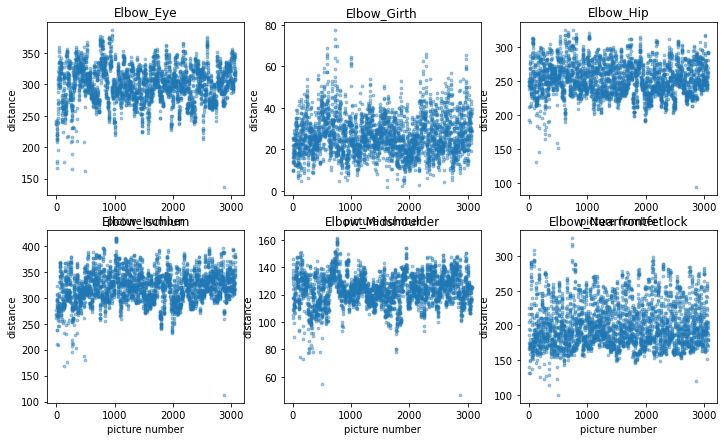

In [46]:
# visualization of distances

fig, axs = plt.subplots(2, 3, figsize=(12, 7))
ind = range(df.shape[0])
axs[0, 0].scatter(ind, fakedf_norm[distances[0]], s = 8, alpha=0.4)
axs[0, 0].set_title (distances[0])

axs[0, 1].scatter(ind, fakedf_norm[distances[1]], s = 8, alpha=0.4)
axs[0, 1].set_title (distances[1])

axs[0, 2].scatter(ind, fakedf_norm[distances[2]], s = 8, alpha=0.4)
axs[0, 2].set_title (distances[2])

axs[1, 0].scatter(ind, fakedf_norm[distances[3]], s = 8, alpha=0.4)
axs[1, 0].set_title (distances[3])

axs[1, 1].scatter(ind, fakedf_norm[distances[4]], s = 8, alpha=0.4)
axs[1, 1].set_title (distances[4])

axs[1, 2].scatter(ind, fakedf_norm[distances[5]], s = 8, alpha=0.4)
axs[1, 2].set_title (distances[5])

for ax in axs.flat:
    ax.set(xlabel='picture number', ylabel='distance')

In [47]:
from sklearn.preprocessing import StandardScaler

x1 = StandardScaler().fit_transform(fakedf_norm) # standart scaler
features_noise = pd.DataFrame(x1)
features_noise.columns = fakedf_norm.columns
data = features_noise


In [48]:
from sklearn.decomposition import PCA

# PCA Projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x1)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

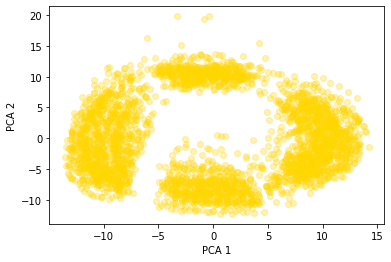

In [49]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

In [50]:
distances[0:40]

Index(['Elbow_Eye', 'Elbow_Girth', 'Elbow_Hip', 'Elbow_Ischium',
       'Elbow_Midshoulder', 'Elbow_Nearfrontfetlock', 'Elbow_Nearfrontfoot',
       'Elbow_Nearhindfetlock', 'Elbow_Nearhindfoot', 'Elbow_Nearhindhock',
       'Elbow_Nearknee', 'Elbow_Nose', 'Elbow_Offfrontfetlock',
       'Elbow_Offfrontfoot', 'Elbow_Offhindfetlock', 'Elbow_Offhindfoot',
       'Elbow_Offhindhock', 'Elbow_Offknee', 'Elbow_Shoulder', 'Elbow_Stifle',
       'Elbow_Wither', 'Eye_Girth', 'Eye_Hip', 'Eye_Ischium',
       'Eye_Midshoulder', 'Eye_Nearfrontfetlock', 'Eye_Nearfrontfoot',
       'Eye_Nearhindfetlock', 'Eye_Nearhindfoot', 'Eye_Nearhindhock',
       'Eye_Nearknee', 'Eye_Nose', 'Eye_Offfrontfetlock', 'Eye_Offfrontfoot',
       'Eye_Offhindfetlock', 'Eye_Offhindfoot', 'Eye_Offhindhock',
       'Eye_Offknee', 'Eye_Shoulder', 'Eye_Stifle'],
      dtype='object')

In [51]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
data = features_noise
model.fit_predict(data)
labels = model.labels_
# labels


# PCA Projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

x_data = fakedf_norm['Eye_Nose']
y_data = fakedf_norm['Elbow_Nose']



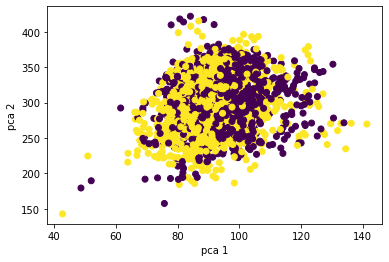

In [52]:
#plot_ind(x_data,y_data,labels,0)
plt.scatter(x_data, y_data, c=labels)
plt.xlabel('pca 1')
plt.ylabel('pca 2')
#for i, column in enumerate(data.columns):
#    plt.scatter(data.index, data[column], c=labels)
#plt.annotate(np.where(labels==0),  PCA_components.loc[(labels==0),0], PCA_components.loc[(labels==0),1])
plt.show()

In [53]:
def show_clusters(X, cluster):
    df = X
    df.loc[:,'label'] = cluster
    colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow', 4:'black', 5:'gold', 6:'lightblue', 7:'darkgreen'}
    fig, ax = plt.subplots(figsize=(8,8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=0, y=1, label=key, color=colors[key])
    plt.xlabel('pca 1')
    plt.ylabel('pca 2')
    plt.show()
    #, 1:'orange', 2:'green', 3:'yellow'

In [54]:
from sklearn.cluster import DBSCAN

# min_samples = the minimum number of core points needed in order to form a cluster
# eps = the maximum distance between two samples for them to be considered as in the same cluster

dbscan=DBSCAN(eps = 2.1, min_samples = 20)

# fit - perform DBSCAN clustering from features, or distance matrix.
dbscan = dbscan.fit(PCA_components)

In [55]:
cluster = dbscan.labels_
len(set(cluster))

2

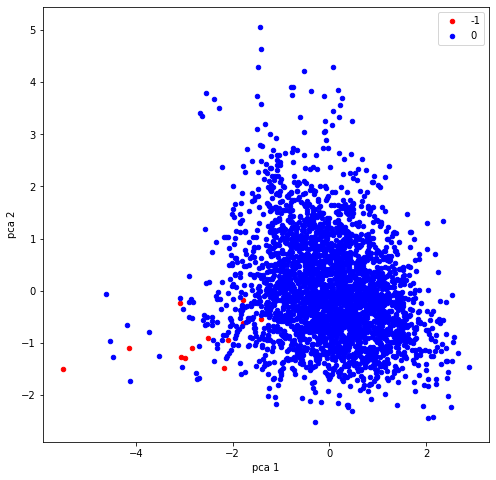

In [56]:
show_clusters(features_noise, cluster)

In [58]:
np.where(dbscan.labels_ == -1)

(array([  18,  124,  181,  257,  340,  477, 1774, 1775, 1776, 1971, 1975,
        2868], dtype=int64),)

In [80]:
1800/3000

0.6

In [69]:
r1 = range(300,500)
r2 = range(300)

In [81]:
X_train = data.copy()
X_test = data.copy()

X_train = X_train.drop(r1) # -200
X_test = X_test.drop(r2) # - 300

X_train = X_train.drop(range(2000,3069)) # - 1069
X_test = X_test.drop(range(500,2000)) # - 1500


In [82]:
X_test.shape

(1269, 232)

In [83]:
X_train.shape

(1800, 232)

In [84]:
Y_train = np.zeros(X_train.shape[0])
Y_train[0:300] = 1

In [85]:
Y_test = np.zeros(X_test.shape[0])
Y_test[0:200] = 1

In [86]:
#### LR

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

predicted_y1 = classifier.predict(X_train)
predicted_y2 = classifier.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
print('LR Accuracy (StandardScaler)')
print('test: {:.4f}'.format(roc_auc_score(Y_test,predicted_y2)))

LR Accuracy (StandardScaler)
test: 0.6251


In [88]:
for name, importance in zip(list(X_train), np.std(X_train.to_numpy(), 0)*classifier.coef_[0]):
    print(name, "=", importance)

Elbow_Eye = -0.629038507640967
Elbow_Girth = 0.3500959579492609
Elbow_Hip = -0.6838686071691211
Elbow_Ischium = -0.37420000609937876
Elbow_Midshoulder = -0.3863090439545307
Elbow_Nearfrontfetlock = 0.22271381434327317
Elbow_Nearfrontfoot = 0.5349567724432643
Elbow_Nearhindfetlock = 0.2326405253665914
Elbow_Nearhindfoot = -0.019758137199769217
Elbow_Nearhindhock = -0.006463585215428474
Elbow_Nearknee = 0.43617411409704937
Elbow_Nose = -0.7402071199416501
Elbow_Offfrontfetlock = 0.26568172002916834
Elbow_Offfrontfoot = -0.45788724096876493
Elbow_Offhindfetlock = -0.447536897590634
Elbow_Offhindfoot = -0.4432237749039952
Elbow_Offhindhock = 0.0988771536470978
Elbow_Offknee = -0.05299675263150753
Elbow_Shoulder = -0.4457406441791852
Elbow_Stifle = 0.6729002267967953
Elbow_Wither = 0.588450194763278
Eye_Girth = -0.07616841292362696
Eye_Hip = 0.8910010073093642
Eye_Ischium = 0.6104308524787502
Eye_Midshoulder = -1.2468497506151244
Eye_Nearfrontfetlock = -0.0455231200812877
Eye_Nearfrontfoot 

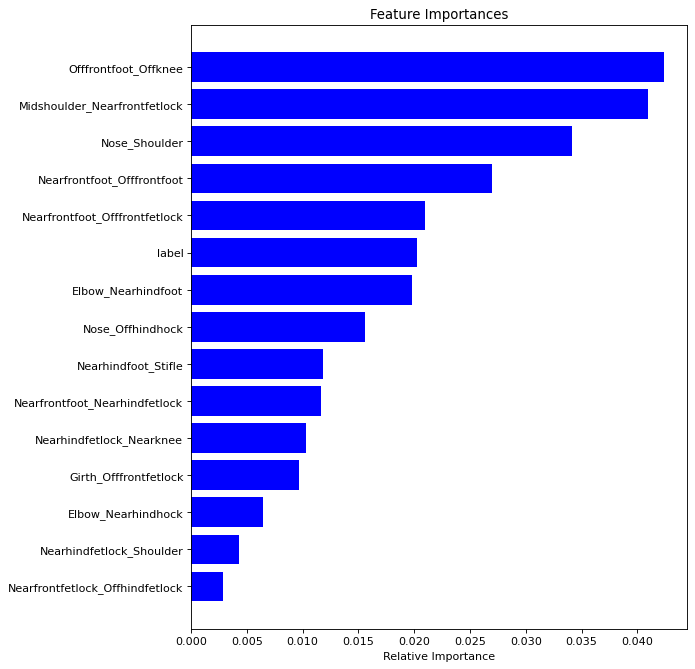

In [91]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

features = list(X_train)
importances = abs(np.std(X_train.to_numpy(), 0)*classifier.coef_[0])
indices = np.argsort(importances)
ind = indices[0:15]

plt.title('Feature Importances')
plt.barh(range(len(ind)), importances[ind], color='b', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

In [127]:
features_fakedf = get_anglesign('anglesign',features_fakedf,fake_data, scorer, 'leftear', 'snout', 'rightear')
features_fakedf.head(15)

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign
labeled-data/m4s1/img0000.png,21.065148,130.422275,15.448649,12.308695,118.255994,125.155534,-1.0
labeled-data/m4s1/img0001.png,17.646751,108.759543,7.461151,13.064119,102.812129,107.249714,-1.0
labeled-data/m4s1/img0002.png,22.852646,123.188361,16.978802,13.835000,111.283449,115.311454,-1.0
labeled-data/m4s1/img0003.png,22.009634,109.555399,20.808251,9.668453,104.079279,100.228119,-1.0
labeled-data/m4s1/img0004.png,21.355422,110.158137,9.855587,15.070578,103.872852,105.433881,-1.0
labeled-data/m4s1/img0005.png,17.609370,261.465970,13.796829,7.283290,247.685887,264.295595,1.0
labeled-data/m4s1/img0006.png,14.429201,134.202714,7.971215,9.627218,126.319085,136.456579,1.0
labeled-data/m4s1/img0007.png,16.682843,131.134883,11.238931,9.406261,120.777129,130.753006,1.0
labeled-data/m4s1/img0008.png,17.787430,158.355463,12.339811,9.406642,146.110530,160.604601,1.0
labeled-data/m4s1/img0009.png,19.132314,254.835284,15.355004,10.551273,244.688611,247.624983,1.0


In [129]:
print((features_fakedf['anglesign'] < 0).sum())
print(features_fakedf.loc[(features_fakedf['anglesign'] < 0),'anglesign'])

7
labeled-data/m4s1/img0000.png   -1.0
labeled-data/m4s1/img0001.png   -1.0
labeled-data/m4s1/img0002.png   -1.0
labeled-data/m4s1/img0003.png   -1.0
labeled-data/m4s1/img0004.png   -1.0
labeled-data/m4s1/img0036.png   -1.0
labeled-data/m4s1/img0102.png   -1.0
Name: anglesign, dtype: float64


In [130]:
features_swapears = get_angle('angle',features_fakedf,fake_data, scorer, 'leftear', 'snout', 'rightear')
features_swapears.head(30)

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign,angle
labeled-data/m4s1/img0000.png,21.065148,130.422275,15.448649,12.308695,118.255994,125.155534,-1.0,-98.098512
labeled-data/m4s1/img0001.png,17.646751,108.759543,7.461151,13.064119,102.812129,107.249714,-1.0,-115.872148
labeled-data/m4s1/img0002.png,22.852646,123.188361,16.978802,13.835000,111.283449,115.311454,-1.0,-95.197179
labeled-data/m4s1/img0003.png,22.009634,109.555399,20.808251,9.668453,104.079279,100.228119,-1.0,-84.002935
labeled-data/m4s1/img0004.png,21.355422,110.158137,9.855587,15.070578,103.872852,105.433881,-1.0,-116.338933
labeled-data/m4s1/img0005.png,17.609370,261.465970,13.796829,7.283290,247.685887,264.295595,1.0,109.380603
labeled-data/m4s1/img0006.png,14.429201,134.202714,7.971215,9.627218,126.319085,136.456579,1.0,109.795378
labeled-data/m4s1/img0007.png,16.682843,131.134883,11.238931,9.406261,120.777129,130.753006,1.0,107.484911
labeled-data/m4s1/img0008.png,17.787430,158.355463,12.339811,9.406642,146.110530,160.604601,1.0,109.014455
labeled-data/m4s1/img0009.png,19.132314,254.835284,15.355004,10.551273,244.688611,247.624983,1.0,93.350921


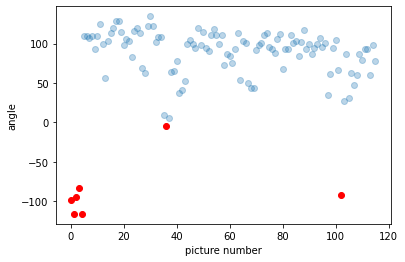

In [132]:
names_data = np.where((features_fakedf['anglesign'] > 0))
names_outliers = np.where((features_fakedf['anglesign'] < 0))
plt.scatter(names_data, features_fakedf.loc[(features_fakedf['anglesign'] > 0),'angle'], alpha=.3)
plt.scatter(names_outliers, features_fakedf.loc[(features_fakedf['anglesign'] < 0),'angle'], color='red')
plt.xlabel('picture number')
plt.ylabel('angle')
plt.show()

In [143]:
from sklearn.preprocessing import StandardScaler

x1 = StandardScaler().fit_transform(features_fakedf) # standart scaler
features_noise = pd.DataFrame(x1)
features_noise.columns = features_fakedf.columns

features_noise.head(20)

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign,angle
0,0.570611,0.441994,0.058997,-0.113856,0.248498,0.543066,-3.946065,-3.561668
1,-0.954158,-0.639530,-1.319880,0.068274,-0.563260,-0.329899,-3.946065,-3.917617
2,1.367921,0.080837,0.323147,0.254130,-0.117992,0.063136,-3.946065,-3.503563
3,0.991897,-0.599796,0.984223,-0.750408,-0.496656,-0.672223,-3.946065,-3.279378
4,0.700087,-0.569704,-0.906530,0.552023,-0.507506,-0.418426,-3.946065,-3.926965
5,-0.970832,6.984420,-0.226155,-1.325462,7.051569,7.326576,0.253417,0.593481
6,-2.389340,0.630734,-1.231828,-0.760350,0.672309,1.094027,0.253417,0.601788
7,-1.384108,0.477571,-0.667724,-0.813621,0.381013,0.815960,0.253417,0.555516
8,-0.891409,1.836573,-0.477680,-0.813529,1.712583,2.271318,0.253417,0.586148
9,-0.291526,6.653379,0.042831,-0.537564,6.894026,6.513832,0.253417,0.272457


In [134]:
'''x2 = StandardScaler().fit_transform(df_swap_ears) # standart scaler
features_swap_ears = pd.DataFrame(x2)
features_swap_ears.columns = df.columns
features_swap_ears.head()'''

'x2 = StandardScaler().fit_transform(df_swap_ears) # standart scaler\nfeatures_swap_ears = pd.DataFrame(x2)\nfeatures_swap_ears.columns = df.columns\nfeatures_swap_ears.head()'

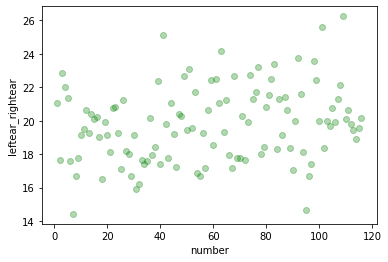

In [135]:
names = list(range(1, features_fakedf.shape[0]+1))
plt.scatter(names, features_fakedf['leftear_rightear'], alpha=.3, color='green')
plt.xlabel('number')
plt.ylabel('leftear_rightear')
plt.show()

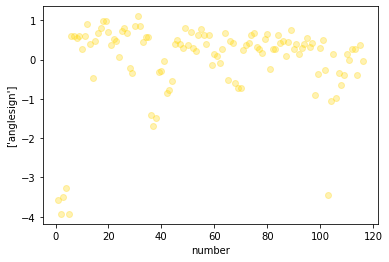

In [136]:
plt.scatter(names, features_noise[['angle']], alpha=.3, color='gold')
plt.xlabel('number')
plt.ylabel(['anglesign'])
plt.show()

In [137]:
from sklearn.decomposition import PCA

# PCA Projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x1)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

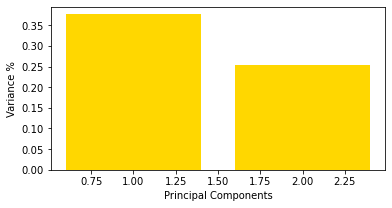

In [138]:
import matplotlib.pyplot as plt

# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)

plt.figure(figsize=(6, 3))
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')

plt.show()

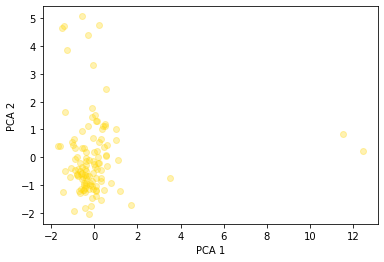

In [139]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [144]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
data = features_fakedf
model.fit_predict(data)
labels = model.labels_
# labels


# PCA Projection to 2D
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(data)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

x_data = data.index
y_data = PCA_components

plot_ind(x_data,y_data,labels,1)
plt.scatter(x_data, y_data, c=labels)
plt.xlabel('picture number')
plt.ylabel('pca 1')
'''for i, column in enumerate(data.columns):
    plt.scatter(data.index, data[column], c=labels)'''
#plt.annotate(np.where(labels==0),  PCA_components.loc[(labels==0),0], PCA_components.loc[(labels==0),1])
plt.show()

TypeError: can only concatenate str (not "float") to str

In [142]:
df.index[np.where(labels == 1)]

Index(['labeled-data/m4s1/img0005.png', 'labeled-data/m4s1/img0009.png'], dtype='object')

In [ ]:
model = KMeans(n_clusters=2)
data1 = features_noise[['snout_tailbase','anglesign','angle']]
model1.fit_predict(data1)
labels1 = model.labels_
# labels


# PCA Projection to 2D
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(data1)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

x_data = data.index
y_data = PCA_components

plot_ind(x_data,y_data,labels,1)
plt.scatter(x_data, y_data, c=labels)
plt.xlabel('picture number')
plt.ylabel('pca 1')
'''for i, column in enumerate(data.columns):
    plt.scatter(data.index, data[column], c=labels)'''
#plt.annotate(np.where(labels==0),  PCA_components.loc[(labels==0),0], PCA_components.loc[(labels==0),1])
plt.show()

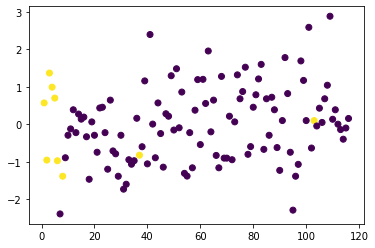

In [77]:

plt.scatter(names,features_noise[['leftear_rightear']], c=labels)
#plot_ind(features_noise,labels,1)
#plt.annotate(np.where(labels==0),  PCA_components.loc[(labels==0),0], PCA_components.loc[(labels==0),1])
plt.show()

In [78]:
'''
Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

The main concept of DBSCAN algorithm is to locate regions of high density 
that are separated from one another by regions of low density 

'''

'\nDensity-Based Spatial Clustering of Applications with Noise (DBSCAN)\n\nThe main concept of DBSCAN algorithm is to locate regions of high density \nthat are separated from one another by regions of low density \n\n'

In [79]:
def show_clusters(X, cluster):
    df = X
    df.loc[:,'label'] = cluster
    colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow', 4:'black', 5:'gold', 6:'lightblue', 7:'darkgreen'}
    fig, ax = plt.subplots(figsize=(8,8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=0, y=1, label=key, color=colors[key])
    plt.xlabel('pca 1')
    plt.ylabel('pca 2')
    plt.show()
    #, 1:'orange', 2:'green', 3:'yellow'

In [80]:
from sklearn.cluster import DBSCAN

# min_samples = the minimum number of core points needed in order to form a cluster
# eps = the maximum distance between two samples for them to be considered as in the same cluster

dbscan=DBSCAN(eps = 3.5, min_samples = 3)

# fit - perform DBSCAN clustering from features, or distance matrix.
dbscan = dbscan.fit(PCA_components)

In [81]:
cluster = dbscan.labels_
len(set(cluster))

1

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


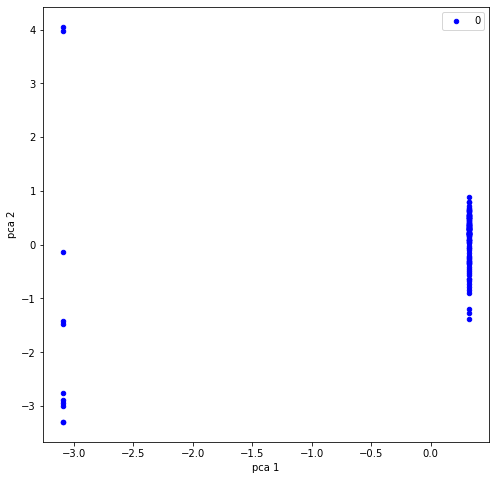

In [84]:
show_clusters(data, cluster)

In [85]:
features_noise.loc[0:6,:]

,leftear_rightear,snout_tailbase,snout_leftear,snout_rightear,tailbase_leftear,tailbase_rightear,anglesign,angle
0,0.570611,1.157837,-0.147459,-0.247215,1.206159,2.390873,-3.089572,-2.993230
1,-0.954158,-0.732707,-0.898955,-0.184543,-1.195405,-0.531509,-3.089572,-3.289801
2,1.367921,0.526521,-0.003495,-0.120589,0.121909,0.784236,-3.089572,-2.944818
3,0.991897,-0.663251,0.356795,-0.466256,-0.998360,-1.677493,-3.089572,-2.758031
4,0.700087,-0.610649,-0.673677,-0.018083,-1.030460,-0.827868,-3.089572,-3.297589
5,-0.970832,-2.147680,2.469875,3.653500,-1.243622,-1.218592,-3.089572,-0.139031
6,-2.389340,-5.165051,5.961945,6.049209,-1.366804,-1.518939,-3.089572,4.055181


In [86]:
(features_noise['label'] == 0).sum()

KeyError: 'label'

In [282]:
(features_noise['label'] == -1).sum()

1

In [283]:
print(features_noise.loc[(features_noise['label'] == 0),'label'])
print(features_noise.loc[(features_noise['label'] == -1),'label'])

0      0
1      0
2      0
3      0
4      0
102    0
Name: label, dtype: int64
36   -1
Name: label, dtype: int64


In [115]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [105]:
mds = MDS(random_state=0)
X_transform = mds.fit_transform(x1)


In [106]:
stress = mds.stress_
print(stress)

2993.64125678587


In [108]:
dist_manhattan = manhattan_distances(x1)
mds = MDS(dissimilarity='precomputed', random_state=0)
# Get the embeddings
X_transform_L1 = mds.fit_transform(dist_manhattan)

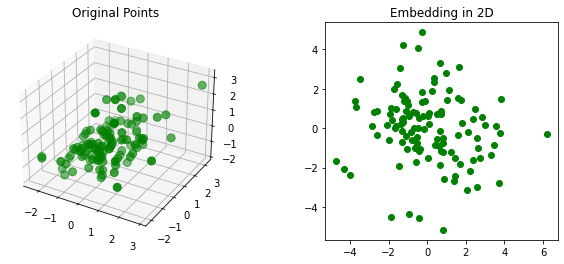

In [113]:

fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121, projection='3d')
plt.scatter(x1[:,0], x1[:,1], zs=x1[:,3],s=64, c='green')
plt.title('Original Points')

ax = fig.add_subplot(122)
plt.scatter(X_transform[:,0], X_transform[:,1], c='green')
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()